In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_ro_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          5.7961 ( 5.5322,  6.5345) ( 5.5224,  6.3411)  0.8187 (Jnode 106)\n',
 't_n56          5.5765 ( 5.0412,  6.3338) ( 4.9660,  6.2197)  1.2537 (Jnode 105)\n',
 't_n57          5.2414 ( 4.7250,  5.9592) ( 4.6445,  5.8408)  1.1963 (Jnode 104)\n',
 't_n58          4.4160 ( 3.9604,  5.0244) ( 3.9038,  4.9460)  1.0422 (Jnode 103)\n',
 't_n59          4.2836 ( 3.8384,  4.8785) ( 3.7815,  4.7925)  1.0110 (Jnode 102)\n',
 't_n60          4.0935 ( 3.6673,  4.6616) ( 3.6260,  4.5958)  0.9698 (Jnode 101)\n',
 't_n61          3.8159 ( 3.4128,  4.3492) ( 3.3620,  4.2718)  0.9098 (Jnode 100)\n',
 't_n62          1.7006 ( 1.4340,  2.0114) ( 1.4182,  1.9876)  0.5694 (Jnode 99)\n',
 't_n63          2.6558 ( 2.3483,  3.0533) ( 2.3191,  3.0035)  0.6844 (Jnode 98)\n',
 't_n64          1.9042 ( 1.6610,  2.2057) ( 1.6452,  2.1785)  0.5333 (Jnode 97)\n',
 't_n65          1.6907 ( 1.4708,  1.9610) ( 1.4538,  1.9383)  0.4845 (Jnode 96)\n',
 't_n66          1.3260 ( 1.1436,  1.5462) ( 1.1318,  1.53

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[5.7961,
 5.5765,
 5.2414,
 4.416,
 4.2836,
 4.0935,
 3.8159,
 1.7006,
 2.6558,
 1.9042,
 1.6907,
 1.326,
 0.9149,
 0.611,
 0.246,
 1.9993,
 4.1787,
 4.0247,
 3.8016,
 2.7332,
 2.4597,
 2.1189,
 4.0606,
 3.8807,
 3.7305,
 3.5031,
 3.2038,
 3.1114,
 2.7364,
 2.5098,
 2.3151,
 1.7569,
 1.6267,
 2.748,
 2.2423,
 3.9797,
 0.8684,
 3.8726,
 3.6452,
 3.2786,
 3.0657,
 2.2821,
 2.6031,
 3.1398,
 3.0157,
 2.8106,
 2.1112,
 2.7078,
 4.7397,
 3.52,
 2.203,
 1.6424,
 3.9652]

In [7]:
lower_ci_iqtree

[5.5322,
 5.0412,
 4.725,
 3.9604,
 3.8384,
 3.6673,
 3.4128,
 1.434,
 2.3483,
 1.661,
 1.4708,
 1.1436,
 0.7793,
 0.5149,
 0.2007,
 1.7453,
 3.739,
 3.5934,
 3.3985,
 2.4039,
 2.1492,
 1.8037,
 3.6349,
 3.4725,
 3.3346,
 3.1314,
 2.8595,
 2.7735,
 2.4289,
 2.225,
 2.046,
 1.5413,
 1.4239,
 2.4406,
 1.9747,
 3.5618,
 0.6779,
 3.463,
 3.2587,
 2.9282,
 2.7321,
 2.0092,
 2.3082,
 2.7949,
 2.6832,
 2.4948,
 1.8469,
 2.3755,
 4.2547,
 3.1067,
 1.8659,
 1.3276,
 3.4561]

In [8]:
upper_ci_iqtree

[6.5345,
 6.3338,
 5.9592,
 5.0244,
 4.8785,
 4.6616,
 4.3492,
 2.0114,
 3.0533,
 2.2057,
 1.961,
 1.5462,
 1.0772,
 0.7263,
 0.3015,
 2.3157,
 4.762,
 4.5954,
 4.3334,
 3.1448,
 2.8459,
 2.4893,
 4.6265,
 4.4208,
 4.2587,
 3.9979,
 3.6607,
 3.5575,
 3.1332,
 2.8751,
 2.6559,
 2.0271,
 1.8788,
 3.1518,
 2.5859,
 4.5339,
 1.0957,
 4.4116,
 4.1549,
 3.7411,
 3.5021,
 2.627,
 2.9871,
 3.5856,
 3.4446,
 3.2195,
 2.4433,
 3.1138,
 5.3923,
 4.0431,
 2.5979,
 2.0072,
 4.7052]

In [9]:
file_LG = open("LG_ro_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

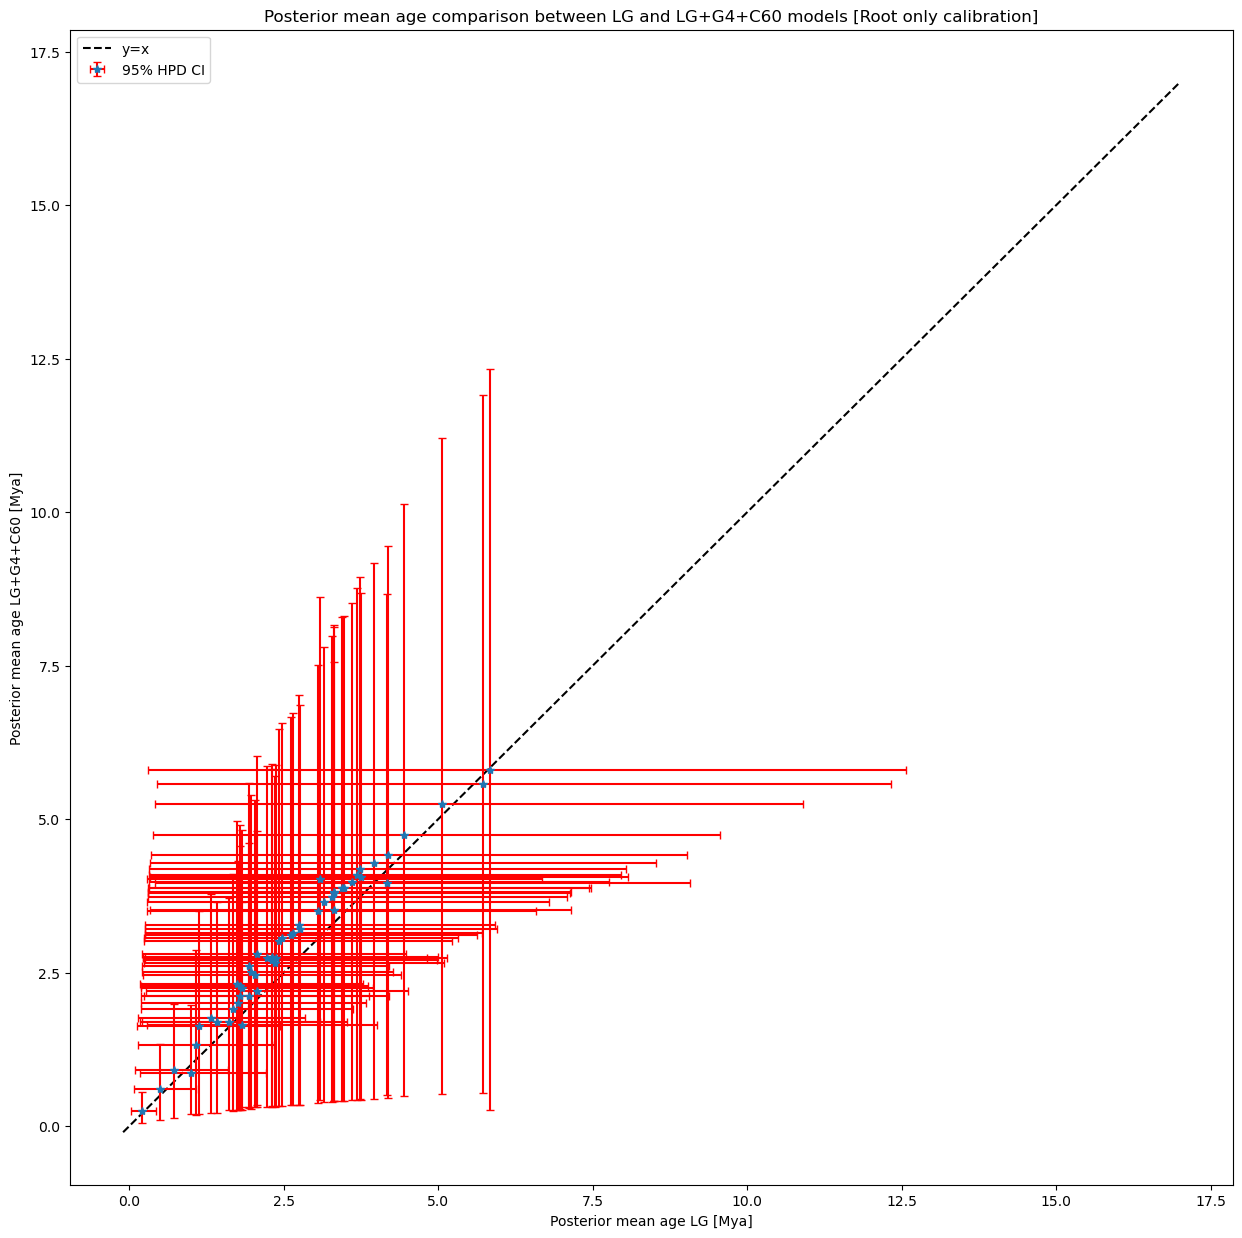

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [Root only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_ro.png')

In [11]:
posterior_mean_baseml

[5.844,
 5.7246,
 5.0653,
 4.1838,
 3.957,
 3.6887,
 3.3154,
 1.6179,
 2.3531,
 1.6722,
 1.4207,
 1.0802,
 0.7313,
 0.4918,
 0.1981,
 1.7656,
 3.7264,
 3.0895,
 3.3043,
 2.3781,
 2.0301,
 1.9355,
 3.7421,
 3.467,
 3.2861,
 3.0496,
 2.7576,
 2.6108,
 2.2307,
 1.977,
 1.749,
 1.3151,
 1.1253,
 2.3166,
 1.8225,
 3.6053,
 0.9995,
 3.4486,
 3.154,
 2.7417,
 2.4651,
 1.7874,
 1.9429,
 2.6505,
 2.421,
 2.068,
 1.7902,
 2.301,
 4.4379,
 3.3113,
 2.0674,
 1.8282,
 4.1752]

In [12]:
posterior_mean_iqtree

[5.7961,
 5.5765,
 5.2414,
 4.416,
 4.2836,
 4.0935,
 3.8159,
 1.7006,
 2.6558,
 1.9042,
 1.6907,
 1.326,
 0.9149,
 0.611,
 0.246,
 1.9993,
 4.1787,
 4.0247,
 3.8016,
 2.7332,
 2.4597,
 2.1189,
 4.0606,
 3.8807,
 3.7305,
 3.5031,
 3.2038,
 3.1114,
 2.7364,
 2.5098,
 2.3151,
 1.7569,
 1.6267,
 2.748,
 2.2423,
 3.9797,
 0.8684,
 3.8726,
 3.6452,
 3.2786,
 3.0657,
 2.2821,
 2.6031,
 3.1398,
 3.0157,
 2.8106,
 2.1112,
 2.7078,
 4.7397,
 3.52,
 2.203,
 1.6424,
 3.9652]

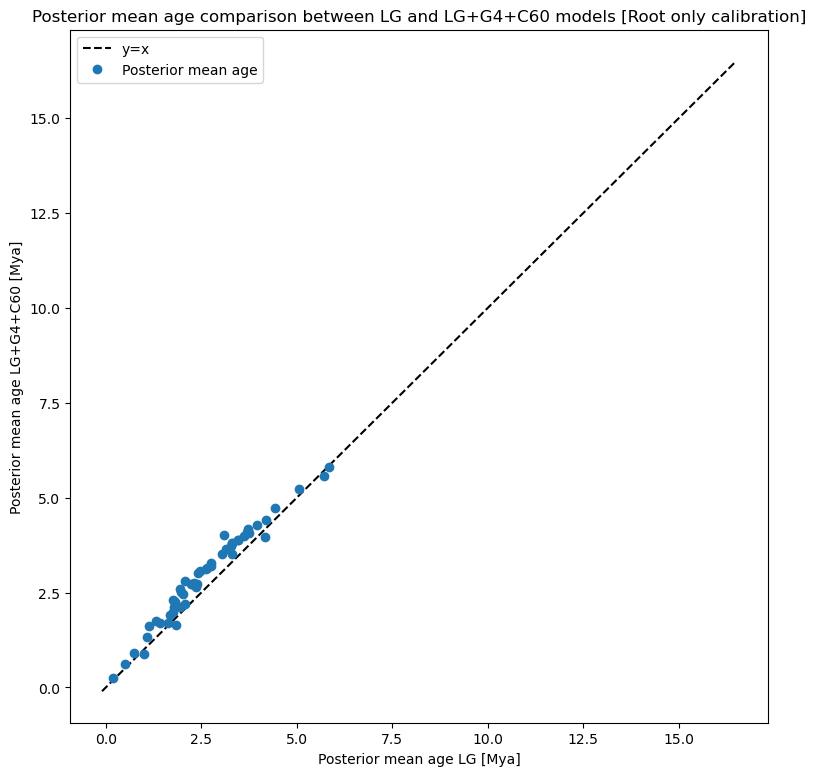

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,16.5], 
        [-0.1, 16.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [Root only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_ro_scatter.png')

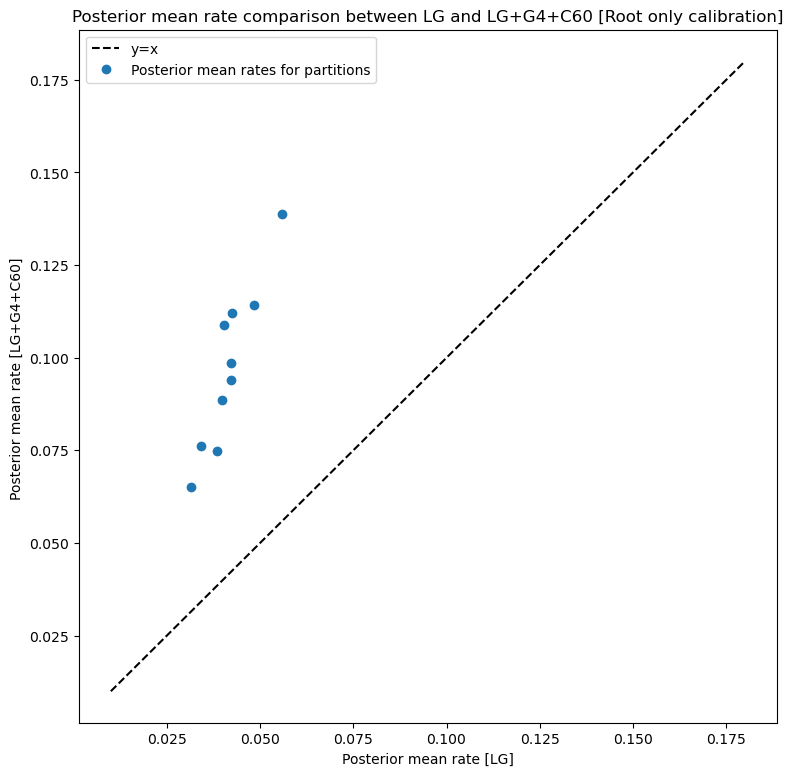

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.18], 
        [0.01, 0.18], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]')
ax.set_ylabel('Posterior mean rate [LG+G4+C60] ')
ax.set_title('Posterior mean rate comparison between LG and LG+G4+C60 [Root only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_rate_comparison_LG_G4_C600_ro_scatter.png')